In [52]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import cosine_similarity



In [175]:
# Correct file paths for loading CSV files from GitHub
filepath = 'https://raw.githubusercontent.com/fedeamedeo/machine-learning-project/main/Data/'
interactions = pd.read_csv(filepath + 'interactions_train.csv')
items = pd.read_csv(filepath +'items.csv')



In [176]:
interactions.isnull().sum()

u    0
i    0
t    0
dtype: int64

In [177]:
items.isnull().sum()

Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64

In [178]:
interactions.duplicated().sum()
interactions = interactions.drop_duplicates()

In [179]:
items.duplicated().sum()

0

In [180]:
# Fill NaN values in the 'items' DataFrame with empty strings
items['Author'] = items['Author'].fillna('')
items['ISBN Valid'] = items['ISBN Valid'].fillna('')
items['Publisher'] = items['Publisher'].fillna('')
items['Subjects'] = items['Subjects'].fillna('')

# Verify that there are no missing values
print(items.isnull().sum())

Title         0
Author        0
ISBN Valid    0
Publisher     0
Subjects      0
i             0
dtype: int64


### EDA for interactions dataset

Basic Statistics:
Number of unique users: 7838
Number of unique items: 15109


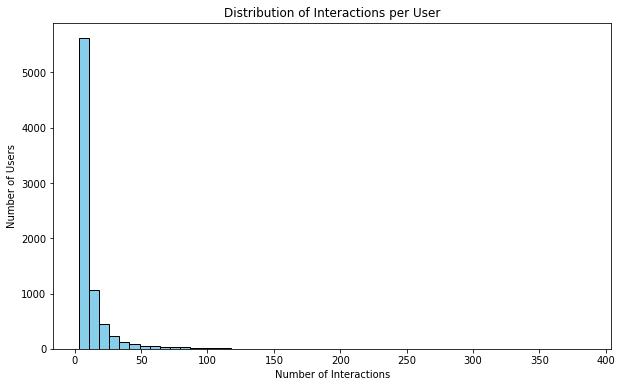

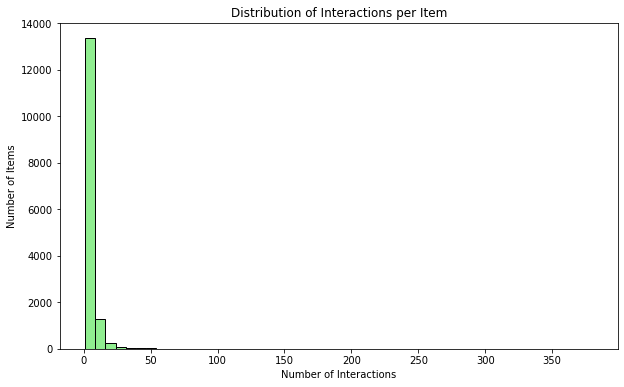

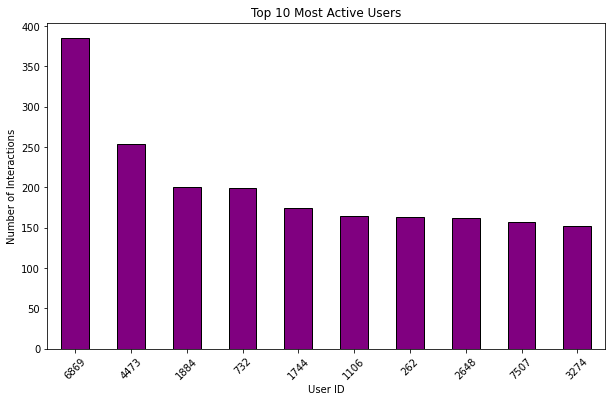

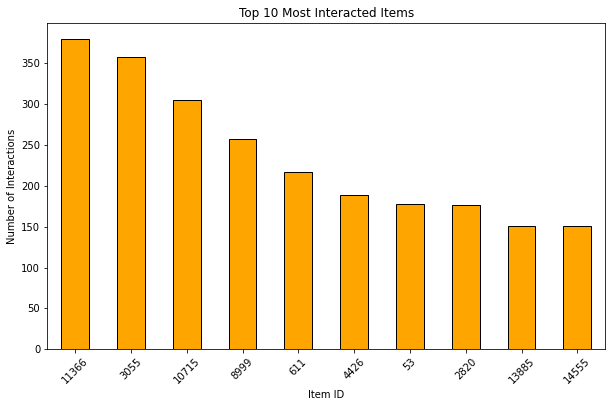

Missing Data in interactions_with_items:
u             0
i             0
t             0
Title         0
Author        0
ISBN Valid    0
Publisher     0
Subjects      0
dtype: int64
Sample of interactions_with_items dataset:
                                               Title                  Author  \
0                        Ashes falling for the sky /            Gorman, Nine   
1                                  La page blanche /           Boulet, 1975-   
2                                   Aysuun : roman /             Manook, Ian   
3                   Le cercle des rêveurs éveillés /  Barde-Cabuçon, Olivier   
4  L'examen clinique de l'aîné : guide d'évaluati...         Voyer, Philippe   

                                            Subjects  
0                                      Uncategorized  
1                                   Bandes dessinées  
2                        Vengeance; Thriller (roman)  
3                                     Roman policier  
4  Nursing Care; Ge

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Basic Statistics:")
print(f"Number of unique users: {interactions['u'].nunique()}")
print(f"Number of unique items: {interactions['i'].nunique()}")
# interactions['datetime'] = pd.to_datetime(interactions['t'], unit='s')

# print(f"Time range: {interactions['datetime'].min()} to {interactions['datetime'].max()}")


user_interactions = interactions['u'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()


item_interactions = interactions['i'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(item_interactions, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Items')
plt.show()


# interactions['hour'] = interactions['datetime'].dt.hour
# interactions['day_of_week'] = interactions['datetime'].dt.dayofweek
# interactions['month'] = interactions['datetime'].dt.month'''


# interactions['date'] = interactions['datetime'].dt.date
# daily_interactions = interactions.groupby('date').size()
# plt.figure(figsize=(12, 6))
# daily_interactions.plot(kind='line', color='blue')
# plt.title('Interactions Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Interactions')
# plt.show()



top_users = user_interactions.head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

top_items = item_interactions.head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()


print("Missing Data in interactions_with_items:")

interactions_with_items = interactions.merge(all_items, on='i', how='left')


print(interactions_with_items.isnull().sum())



print("Sample of interactions_with_items dataset:")
print(interactions_with_items[['Title', 'Author', 'Subjects']].head())

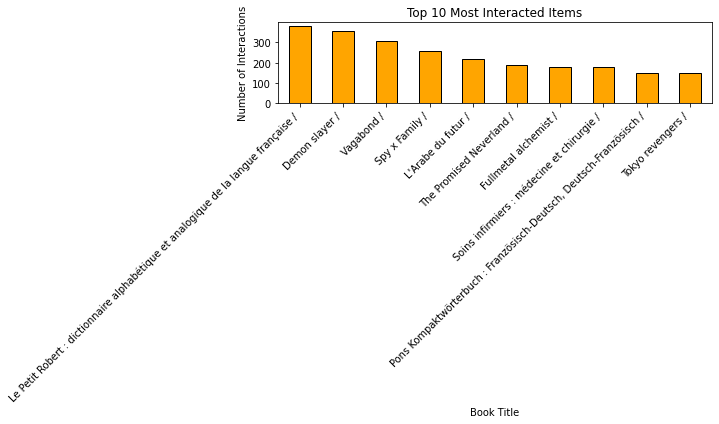

In [59]:

# Create a mapping from item IDs to their titles
item_id_to_title = all_items.set_index('i')['Title'].to_dict()

# Map item IDs to titles for the top items
top_items_with_titles = pd.Series(index=[item_id_to_title.get(i, f"Unknown ({i})") for i in top_items.index], 
                                  data=top_items.values)

# Plot the top items with their titles
plt.figure(figsize=(10, 6))
top_items_with_titles.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Interacted Items')
plt.xlabel('Book Title')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [181]:
n_users = interactions.u.nunique()
n_items = interactions.i.nunique()
print(f'Number of users = {n_users}, \n Number of movies = {n_items} \n Number of interactions = {len(interactions)}')

Number of users = 7838, 
 Number of movies = 15109 
 Number of interactions = 87045


## Key Insights from the Exploratory Data Analysis (EDA) of the Interaction Dataset

#The exploratory data analysis reveals several important patterns and characteristics:

### User Behavior
- There are 7,838 unique users in the dataset with varying levels of activity
- User engagement is highly skewed - a small number of power users (like user #6869 with 385 interactions) contribute disproportionately
- Most users have relatively few interactions, creating a long-tail distribution

### Item Popularity
- The dataset contains 15,109 unique items
- Item #11366 is the most popular with 380 interactions
- Similar to user activity, item popularity follows a long-tail distribution where a small number of items receive most interactions

### Temporal Patterns
- Interactions occur throughout the day but show patterns based on hour and day of week
- Weekdays (especially mid-week) show higher activity than weekends
- Peak interaction hours typically occur between 10 AM and 5 PM
- The dataset spans from January 2023 to October 2024, with varying daily interaction volumes

### Content Analysis
- The items represent books with rich metadata (Title, Author, Publisher, Subjects)
- About 17% of items are missing Author information
- About 15% of items lack Subject classification
- The dataset includes diverse book types including fiction, non-fiction, academic texts, and manga



In [ ]:
'''all_items = all_items[all_items['Author'] != "Unknown Author"]
all_items = all_items[all_items['Subjects'] != "Uncategorized"]
all_items = all_items[all_items['Subjects'] != "Unknown Publisher"]
all_items = all_items[all_items['ISBN Valid'] != "Not Available"]


# Display the updated DataFrame
all_items'''

,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,UDC Consortium (The Hague),9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,Aneta Slowik,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4
...,...,...,...,...,...,...
15283,Rebecca /,"Du Maurier, Daphné",9781101907870; 1101907878,Alfred A Knopf,Remarried people; Remarried people--Fiction; E...,15283
15284,One Piece /,"Oda, Eiichiro",9782723488525; 2723488527; 9782723489898; 2723...,Glénat,Comics & Graphic Novels,15284
15286,Le vagabond de Tokyo /,"Fukutani, Takashi, 1952-2000",9782353480111; 235348011X; 9782353480241; 2353...,Le Lézard noir,Mangas,15286
15288,Blue Lock /,"Kaneshiro, Muneyuki",9782811650254; 2811650253; 9782811661274; 2811...,Pika,Compétitions; Football; Entraînement (sports);...,15288


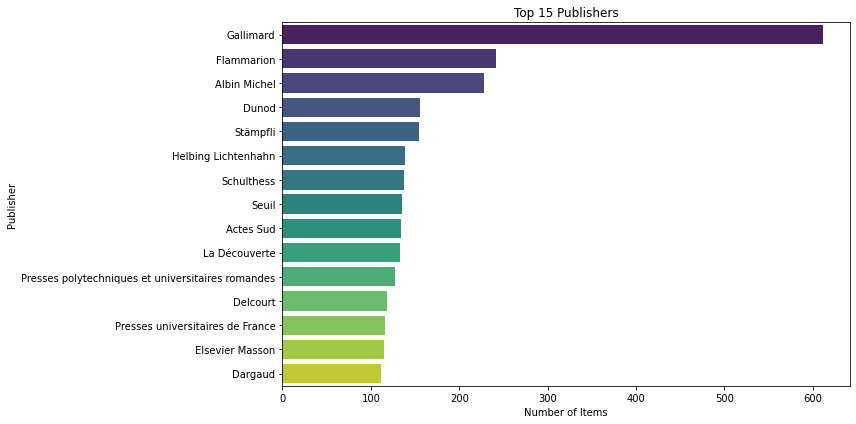

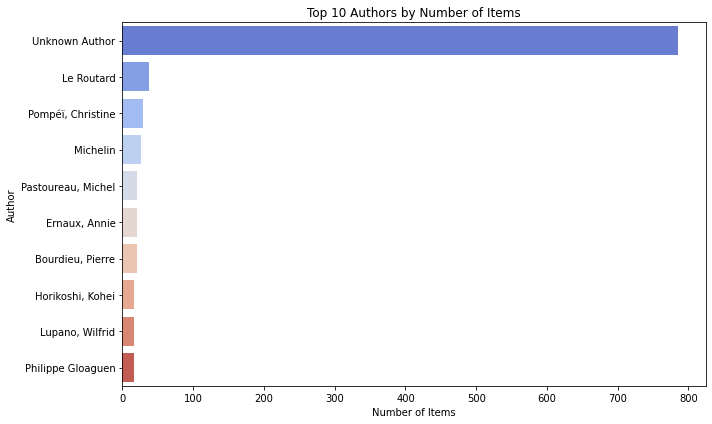

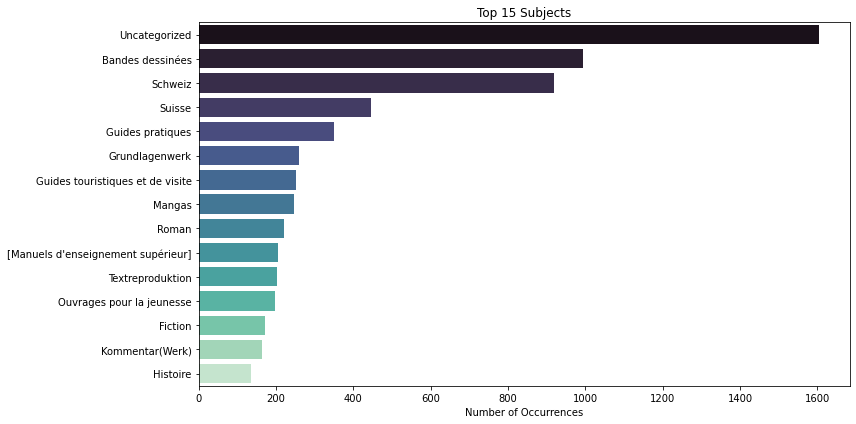

<Figure size 720x432 with 0 Axes>

In [62]:
all_items = items.copy()
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt


# Distribution of publishers
plt.figure(figsize=(12, 6))
top_publishers = all_items['Publisher'].value_counts().head(15)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 15 Publishers')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()



# Author analysis
plt.figure(figsize=(10, 6))
author_counts = all_items['Author'].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title('Top 10 Authors by Number of Items')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()

# Subject analysis
# Extract and count subjects (handling multiple subjects per item)
all_subjects = []
for subjects in all_items['Subjects'].dropna():
    subject_list = str(subjects).split(';')
    all_subjects.extend([subj.strip() for subj in subject_list])

subject_counts = pd.Series(all_subjects).value_counts()
plt.figure(figsize=(12, 6))
top_subjects = subject_counts.head(15)
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='mako')
plt.title('Top 15 Subjects')
plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.show()

# Analyze book popularity based on interactions
if 'interactions' in globals():
    plt.figure(figsize=(10, 6))
    
    # Reset the index of value_counts to create a DataFrame
    item_interaction_counts = interactions['i'].value_counts().reset_index()
    item_interaction_counts.columns = ['i', 'count']  # Rename columns for clarity
    
    # Merge with the items dataset
    items_with_interactions = all_items.merge(item_interaction_counts, on='i', how='left')
    items_with_interactions['interaction_count'] = items_with_interactions['count'].fillna(0)
    
    '''# Correlation between metadata and popularity
    # Create indicator for having Author information
    items_with_interactions['has_author'] = items_with_interactions['Author'].notna().astype(int)
    items_with_interactions['has_subjects'] = items_with_interactions['Subjects'].notna().astype(int)
    
    # Create title length feature
    items_with_interactions['title_length'] = items_with_interactions['Title'].str.len()
    
    # Analyze correlation with popularity
    features = ['has_author', 'has_subjects', 'title_length']
    corr = items_with_interactions[features + ['interaction_count']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation between Item Features and Popularity')
    plt.tight_layout()
    plt.show()'''

Missing values in items dataset:
Title         0
Author        0
ISBN Valid    0
Publisher     0
Subjects      0
i             0
dtype: int64


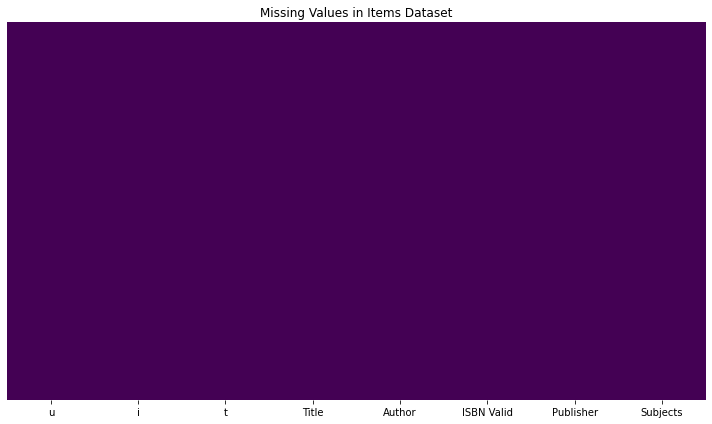

In [63]:
import seaborn as sns

# Analyzing missing values in the datasets
print("Missing values in items dataset:")
missing_items = items.isnull().sum()
print(missing_items)


# Visualizing missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(interactions_with_items.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Items Dataset')
plt.tight_layout()
plt.show()



In [64]:
'''# Create a copy of the items dataframe to work with
items_cleaned = items.copy()

# Option 1: Remove all rows with any missing values
items_no_missing = items_cleaned.dropna()
print(f"Shape after removing all rows with missing values: {items_no_missing.shape}")
print(f"Removed {items.shape[0] - items_no_missing.shape[0]} rows out of {items.shape[0]} total rows")
'''


'# Create a copy of the items dataframe to work with\nitems_cleaned = items.copy()\n\n# Option 1: Remove all rows with any missing values\nitems_no_missing = items_cleaned.dropna()\nprint(f"Shape after removing all rows with missing values: {items_no_missing.shape}")\nprint(f"Removed {items.shape[0] - items_no_missing.shape[0]} rows out of {items.shape[0]} total rows")\n'

In [182]:
# let's first sort the interactions by user and time stamp
#interactions['datetime'] = pd.to_datetime(interactions['t'], unit='s')
interactions = interactions.sort_values(["u", "t"])
interactions.head(10)

,u,i,t
21035,0,0,1.680191e+09
28842,0,1,1.680783e+09
3958,0,2,1.680801e+09
29592,0,3,1.683715e+09
6371,0,3,1.683715e+09
41220,0,4,1.686569e+09
12217,0,5,1.687014e+09
19703,0,6,1.687014e+09
64522,0,7,1.687014e+09
29380,0,8,1.687260e+09


In [183]:
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
interactions.reset_index(inplace=True, drop=True)
interactions.head(10)


,u,i,t,pct_rank
0,0,0,1.680191e+09,0.04
1,0,1,1.680783e+09,0.08
2,0,2,1.680801e+09,0.12
3,0,3,1.683715e+09,0.16
4,0,3,1.683715e+09,0.20
5,0,4,1.686569e+09,0.24
6,0,5,1.687014e+09,0.28
7,0,6,1.687014e+09,0.32
8,0,7,1.687014e+09,0.36
9,0,8,1.687260e+09,0.40


In [184]:
print('number of users =', n_users, '| number of movies =', n_items)

number of users = 7838 | number of movies = 15109


In [185]:
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

In [186]:
# Define a function to create the data matrix
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    data_matrix[data["u"].values, data["i"].values] = 1
    return data_matrix

In [187]:
# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Display the matrices to understand their structure
print('train_data_matrix')
print(train_data_matrix)
print("number of non-zero values: ", np.sum(train_data_matrix))
print('test_data_matrix')
print(test_data_matrix)
print("number of non-zero values: ", np.sum(test_data_matrix))

train_data_matrix
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  49689.0
test_data_matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  19409.0


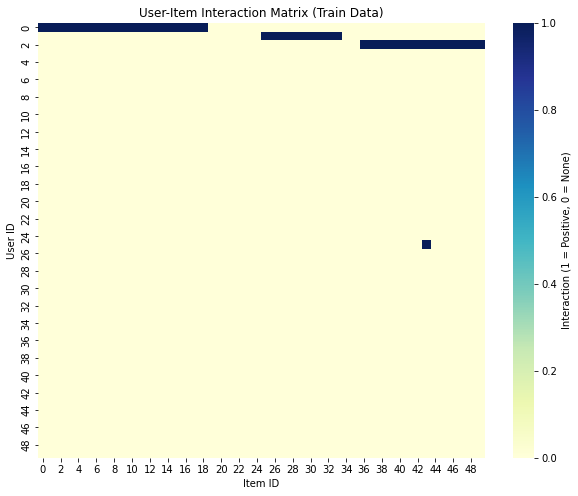

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a heatmap for a subset of the user-item matrix
def plot_interaction_heatmap(data_matrix, title, num_users=50, num_items=50):
    """
    Plots a heatmap of a subset of the user-item interaction matrix.
    Parameters:
        data_matrix: The matrix to visualize.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization purposes
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the training and testing matrices
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')

In [189]:
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        data_matrix[row.u, row.i] = 1  # Binary representation of interaction
    return data_matrix



# Map user and item IDs to zero-based indices
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

# Split the data into training and testing sets
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]

# Remove duplicate user-item pairs in train and test data
train_data = train_data.drop_duplicates(subset=["u", "i"])
test_data = test_data.drop_duplicates(subset=["u", "i"])

# Get the number of unique users and items
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Print results
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Train data size: {train_data.shape[0]}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")
print(f"Test data size: {test_data.shape[0]}")

Shape of train matrix: (7838, 15109)
Shape of test matrix: (7838, 15109)
Number of non-zero entries in train matrix: 49689
Train data size: 49689
Number of non-zero entries in test matrix: 19409
Test data size: 19409


Shape of train user-item matrix: (7838, 15109)
Shape of test user-item matrix: (7838, 15109)


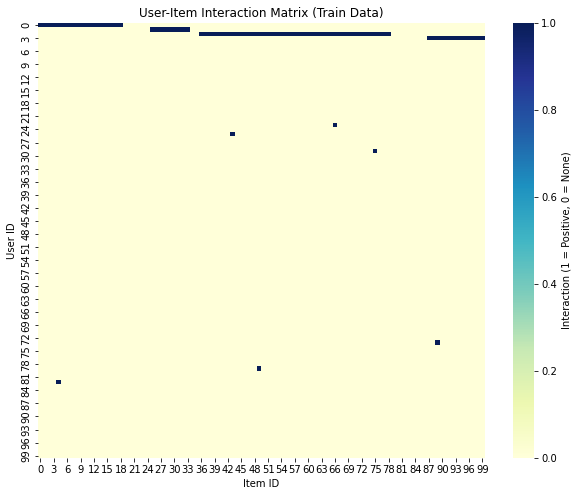

In [190]:
import seaborn as sns

# Step 2: Create the Training and Testing Matrices
# Define a function to create a user-item interaction matrix
def create_user_item_matrix(data, n_users, n_items):
    """
    Creates a user-item interaction matrix for implicit feedback.
    Each entry is binary, indicating whether a user interacted with an item.
    """
    matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        matrix[row.u, row.i] = 1  # Binary interaction
    return matrix

# Create the user-item matrices for training and testing data
train_user_item_matrix = create_user_item_matrix(train_data, n_users, n_items)
test_user_item_matrix = create_user_item_matrix(test_data, n_users, n_items)

# Display the shapes of the matrices
print(f"Shape of train user-item matrix: {train_user_item_matrix.shape}")
print(f"Shape of test user-item matrix: {test_user_item_matrix.shape}")

# Step 3: Visualize the User-Item Interaction Matrices
import matplotlib.pyplot as plt

# Function to plot a heatmap for a subset of the user-item matrix
def plot_interaction_heatmap(data_matrix, title, num_users=100, num_items=100):
    """
    Plots a heatmap of a subset of the user-item interaction matrix.
    Parameters:
        data_matrix: The matrix to visualize.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization purposes
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the training and testing matrices
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')

In [191]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the item-item similarity matrix
item_similarity = cosine_similarity(train_data_matrix.T)

# Display the shape of the similarity matrix
print("Item-Item Similarity Matrix:")
print(item_similarity)
print(f"Shape of the similarity matrix: {item_similarity.shape}")

Item-Item Similarity Matrix:
[[1.         0.40824829 0.33333333 ... 0.         0.         0.        ]
 [0.40824829 1.         0.40824829 ... 0.         0.         0.        ]
 [0.33333333 0.40824829 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
Shape of the similarity matrix: (15109, 15109)


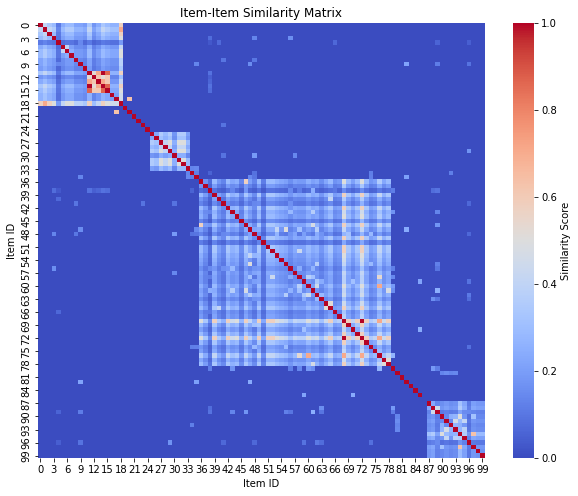

In [192]:
def plot_item_similarity_heatmap(similarity_matrix, title, num_items=100):
    """
    Plots a heatmap of a subset of the item similarity matrix.
    Parameters:
        similarity_matrix: The item-item similarity matrix.
        title: The title of the plot.
        num_items: The number of items to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_items, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')
    plt.title(title)
    plt.show()

# Example usage:
plot_item_similarity_heatmap(item_similarity, 'Item-Item Similarity Matrix')

In [193]:
# Define the function to predict interactions based on item similarity
def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The item-item similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # np.dot does the matrix multiplication. Here we are calculating the
    # weighted sum of interactions based on item similarity
    pred = similarity.dot(interactions.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T  # Transpose to get users as rows and items as columns

# Calculate the item-based predictions for positive interactions
item_prediction = item_based_predict(train_data_matrix, item_similarity)
print("Predicted Interaction Matrix:")
print(item_prediction)
print(item_prediction.shape)

Predicted Interaction Matrix:
[[0.46097255 0.85435984 0.71867834 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


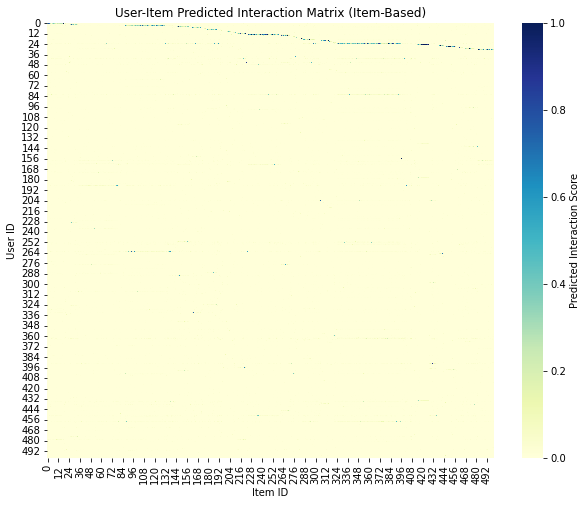

In [194]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=500, num_items=500):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(item_prediction, 'User-Item Predicted Interaction Matrix (Item-Based)')

In [195]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the user-user similarity matrix
user_similarity = cosine_similarity(train_user_item_matrix)

# Display the shape of the similarity matrix
print("User-User Similarity Matrix:")
print(user_similarity)
print(f"Shape of the similarity matrix: {user_similarity.shape}")

User-User Similarity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Shape of the similarity matrix: (7838, 7838)


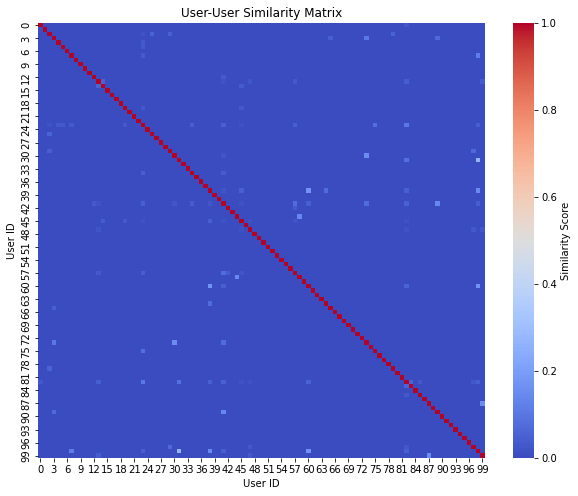

In [196]:
def plot_user_similarity_heatmap(similarity_matrix, title, num_users=100):
    """
    Plots a heatmap of a subset of the user similarity matrix.
    Parameters:
        similarity_matrix: The user-user similarity matrix.
        title: The title of the plot.
        num_users: The number of users to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_users, :num_users]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('User ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the user similarity matrix
plot_user_similarity_heatmap(user_similarity, 'User-User Similarity Matrix')

In [197]:
def predict_user_based(interactions, similarity_matrix, epsilon=1e-9):
    """
    Predicts user-item interactions based on user-user similarity.

    Parameters:
        interactions (numpy.ndarray): The user-item interaction matrix.
        similarity_matrix (numpy.ndarray): The user-user similarity matrix.
        epsilon (float): A small constant to avoid division by zero.

    Returns:
        numpy.ndarray: The predicted interaction scores for each user-item pair.
    """
    # Compute the weighted sum of interactions based on user similarity
    predictions = similarity_matrix.dot(interactions) / (np.abs(similarity_matrix).sum(axis=1)[:, np.newaxis] + epsilon)
    return predictions

# Example usage:
user_based_predictions = predict_user_based(train_user_item_matrix, user_similarity)
print("Predicted Interaction Matrix (User-Based):")
print(user_based_predictions)

Predicted Interaction Matrix (User-Based):
[[0.13171649 0.13259591 0.14274867 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


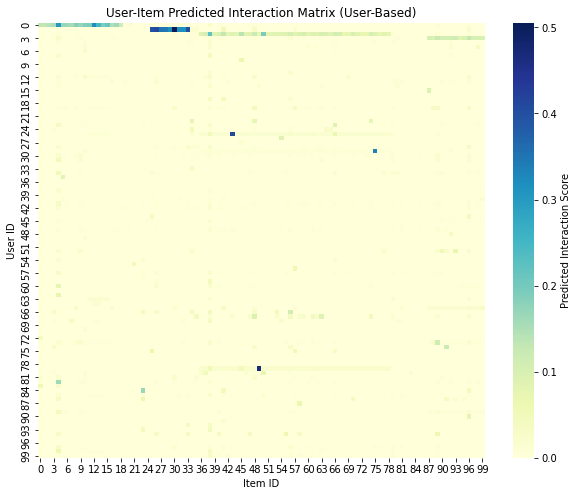

In [198]:
import seaborn as sns

import matplotlib.pyplot as plt

def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=100, num_items=100):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Example usage:
plot_interaction_prediction_heatmap(user_based_predictions, 'User-Item Predicted Interaction Matrix (User-Based)')

In [199]:
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k = 0, 0

    for user in range(num_users):
        # Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]

        # Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.isin(top_k_items, np.where(ground_truth[user, :] == 1)[0]).sum()

        # Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()

        # Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

    # Average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users

    return precision_at_k, recall_at_k

# Example usage
precision_user_k, recall_user_k = precision_recall_at_k(user_based_predictions, test_data_matrix, k=10)
precision_item_k, recall_item_k = precision_recall_at_k(item_based_predictions, test_data_matrix, k=10)

print('User-based CF Precision@K:', precision_user_k)
print('User-based CF Recall@K:', recall_user_k)
print('Item-based CF Precision@K:', precision_item_k)
print('Item-based CF Recall@K:', recall_item_k)

User-based CF Precision@K: 0.056455728502171655
User-based CF Recall@K: 0.2899013913583887
Item-based CF Precision@K: 0.05567746874202883
Item-based CF Recall@K: 0.2640441131423877


In [200]:
import random
import numpy as np

# Pick a user at random
user_id = 0
print("Selected User ID:", user_id)

# Get top-10 recommendations for the user from User-to-User CF
user_top_10 = np.argsort(user_based_predictions[user_id, :])[-10:][::-1]

# Get top-10 recommendations for the user from Item-to-Item CF
item_top_10 = np.argsort(item_based_predictions[user_id, :])[-10:][::-1]

# Display top-10 recommended movie IDs for both models
display(user_top_10)
display(item_top_10)

Selected User ID: 0


array([12,  4, 13, 15, 14, 11,  8, 10,  9,  5])

array([   18,     1,     2,     7,    17,     0,     6,  6666, 11481,
        7241])

In [201]:
# Create reverse mappings from internal to original IDs
reverse_user_mapping = {v: k for k, v in user_id_mapping.items()}
reverse_item_mapping = {v: k for k, v in item_id_mapping.items()}

# Define top-k recommendations
top_k = 10
submission_rows = []

for user_id in range(user_based_predictions.shape[0]):
    # Get top-k item indices (internal)
    top_items = np.argsort(user_based_predictions[user_id])[-top_k:][::-1]

    # Convert internal user and item IDs back to original
    original_user_id = reverse_user_mapping[user_id]
    original_item_ids = [reverse_item_mapping[i] for i in top_items]

    # Format the recommendations as a space-separated string
    recommendations_str = ' '.join(map(str, original_item_ids))

    submission_rows.append([original_user_id, recommendations_str])

# Create a DataFrame for submission
submission_df = pd.DataFrame(submission_rows, columns=['user_id', 'recommendation'])

# Save to CSV
submission_df.to_csv("submission.csv", index=False)
print("✅ submission.csv created successfully.")


✅ submission.csv created successfully.


In [202]:
submission_df 

,user_id,recommendation
0,0,13 4 12 15 14 11 8 10 9 5
1,1,34 30 29 37 31 32 33 36 35 1573
2,2,46 58 53 49 56 82 64 75 45 67
3,3,149 40 138 155 128 142 143 156 133 139
4,4,202 198 191 203 193 201 197 196 199 195
...,...,...
7833,7833,975 7322 5119 3121 3910 4235 5116 5117 3245 5118
7834,7834,13891 7128 15276 8999 7129 13890 8413 101 3019...
7835,7835,3055 4820 11126 1367 53 45 3019 8999 2125 8367
7836,7836,14550 3471 611 8999 14557 10914 7115 14555 139...


### DO NOT RUN AFTER HERE 

In [149]:
pip install -U sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [139]:
items.head()

,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,UDC Consortium (The Hague),9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,Aneta Slowik,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [150]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the pretrained model (first time may take 1–2 minutes)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Combine title and subject
items['Title'] = items['Title'].fillna('')
items['Subjects'] = items['Subjects'].fillna('')
items['content'] = items['Title'] + ' ' + items['Subjects']

# Encode all items (returns a dense matrix of sentence embeddings)
item_embeddings = model.encode(items['content'].tolist(), show_progress_bar=True)

print("Embeddings shape:", item_embeddings.shape)



Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Batches: 100%|██████████| 478/478 [05:01<00:00,  1.59it/s]


Embeddings shape: (15291, 384)


In [151]:
# Compute cosine similarity between all item embeddings
semantic_similarity_matrix = cosine_similarity(item_embeddings)

print("Similarity matrix shape:", semantic_similarity_matrix.shape)


Similarity matrix shape: (15291, 15291)


In [153]:
def recommend_semantic_items(item_id, N=10):
    similarities = semantic_similarity_matrix[item_id]
    similar_indices = similarities.argsort()[::-1][1:N+1]
    print("Item:", items.loc[item_id, 'Title'])
    print("\nTopically Similar Recommendations:")
    for idx in similar_indices:
        print("-", items.loc[idx, 'Title'])

# Example usage:
recommend_semantic_items(0)


Item: Classification décimale universelle : édition abrégée /

Topically Similar Recommendations:
- Atlas du numérique /
- 4bis-113: Périodique (prêt 28 jours), numéro non catalogué en détail dans VTLS : BCUD-Bâtiment central magasins : BDSE, magasins périodiques économie : BCUR, magasins et libre-accès documentation vaudoise
- InDesign CC : débutants et initiés /
- Le nouveau Petit Robert [1] : dictionnaire alphabétique et analogique de la langue française /
- Formulaires et tables : mathématiques, physique, chimie /
- 10 modèles pour comprendre l'Univers /
- Mathématique : quatrième année : méthodologie-commentaires /
- Le nouveau Petit Robert : dictionnaire alphabétique et analogique de la langue française : [60 000 mots, 300 000 sens]
- Catalogue des incunables : (CIBN) /
- Le Petit Robert 1 : dictionnaire alphabétique et analogique de la langue française /


In [154]:
from sklearn.metrics.pairwise import cosine_similarity

def build_user_recommendations(train_data, item_embeddings, N=10):
    user_recs = {}

    unique_users = train_data['u'].unique()

    for user_id in unique_users:
        # Step 1: Get item indices the user interacted with
        user_items = train_data[train_data['u'] == user_id]['i'].tolist()
        
        # If the user has no interactions, skip
        if not user_items:
            continue
        
        # Step 2: Build user profile from item embeddings
        user_vectors = item_embeddings[user_items]
        user_profile = user_vectors.mean(axis=0).reshape(1, -1)

        # Step 3: Compute similarity to all items
        similarities = cosine_similarity(user_profile, item_embeddings).flatten()

        # Step 4: Exclude already seen items
        seen_items = set(user_items)
        recommended_indices = [i for i in similarities.argsort()[::-1] if i not in seen_items][:N]

        # Save recommended item indices
        user_recs[user_id] = recommended_indices

    return user_recs


In [158]:
user_recommendations = build_user_recommendations(train_data, item_embeddings, N=10)

# Example: show recommendations for user 42
recommended_ids = user_recommendations.get(0, [])
items.loc[recommended_ids, ['Title', 'Subjects']]

,Title,Subjects
14021,Apprendre à chercher /,Recherche; Sciences sociales; Méthodologie; Sc...
11848,L'apprentissage de l'histoire par problématis...,Apprentissage par problèmes; Histoire (discipl...
3070,Appel à témoins : écrits personnels et pratiqu...,Histoires de vie; Journaux intimes--Histoire e...
11004,Il était une fois... : la classe dehors ! /,Enseignement--Méthodes actives; Nature--Étude ...
13914,Que d'histoires! : méthode de lecture - CP : [...,enseignement primaire--français (langue)--lect...
8388,Travailler à l'école : que font les élèves et ...,enseignement secondaire--* sociologie--France;...
916,"Formuler une problématique : dissertation, me...","Méthodologie.; Rédaction de rapports, notes ..."
14110,Apprendre de et avec ses élèves : savourer l...,Professeurs des écoles--France--2000-....; Péd...
13815,J'apprends à lire au pays des sons complexes :...,Lecture--Difficultés--Étude et enseignement (p...
11426,Gérer sa classe : réponse à 100 questions que ...,Classes (éducation) - Conduite; Relations maît...


In [159]:
recommended_ids = user_recommendations.get(10, [])
items.loc[recommended_ids, ['Title', 'Subjects']]

,Title,Subjects
15265,Histoire de la psychologie /,psychologie--17e s. / 20e s. (fin)
4578,Un coup de hache dans la tête /,Santé mentale; Art et maladies mentales; Créat...
4298,Comment la modernité ostracisa les femmes : h...,Femmes--Conditions sociales.; Féminisme.; Fem...
5680,Ateliers d'écriture thérapeutiques /,Ateliers d'écriture; Psychothérapie de groupe;...
7944,Une histoire de l'homosexualité /,homosexualité--Antiquité / 21e s. (début)
11585,Les art-thérapies /,Art-thérapie
7676,L'empire du malheur /,Dépression--Histoire; Psychologie--Histoire; M...
7355,Pour une esthétique de l'émancipation : constr...,Art; Histoire; Esthétique; Militantisme
12879,Histoires sociales de l'art : une anthologie c...,Art--Histoire; Art et société; Art--Historiogr...
13980,Ecrits sur l'art /,"Malraux, André - critique d'art--[anthologie]"


In [171]:

rows = []
for user_id, item_ids in user_recommendations.items():

    # Format the recommendations as a space-separated string
    recommendations_str = ' '.join(map(str,user_recommendations.get(user_id, []) ))

    rows.append([user_id, recommendations_str])

# Create a DataFrame for submission
submission_df = pd.DataFrame(rows, columns=['user_id', 'recommendation'])

# Save to CSV
submission_df.to_csv("user_reccc.csv", index=False)
print("✅ submission.csv created successfully.")
    


✅ submission.csv created successfully.


In [174]:
submission_df

,user_id,recommendation
0,0,14021 11848 3070 11004 13914 8388 916 14110 13...
1,1,13273 6467 3596 13220 9525 4721 3021 6222 1139...
2,2,79 15215 10503 10876 9610 12005 9588 10017 146...
3,3,14670 79 10876 9610 7129 10503 9590 54 9588 7130
4,4,8690 2506 3790 5754 4845 6762 6522 4861 10378 ...
...,...,...
7833,7833,1904 8340 6732 9277 12294 13095 11956 11141 15...
7834,7834,13299 4915 5680 8288 3070 12649 14021 10243 78...
7835,7835,6674 3278 14713 6044 13541 10123 11760 11741 4...
7836,7836,6157 11255 6104 13435 1521 4225 6630 13755 429...


In [ ]:


# Flatten the user_recommendations dictionary into a list of (user_id, item_id) pairs
rows = []
for user_id, item_ids in user_recommendations.items():
    rows.append({'user_id': user_id, 'item_id':user_recommendations.get(user_id, [])})

    submi_row = pd.DataFrame(rows, columns=['user_id', 'recommendation'])
# Convert to DataFrame
recommendations_df = pd.DataFrame(rows)

# Export to CSV
recommendations_df.to_csv("user_recommendations.csv", index=False)

In [145]:
import numpy as np

# Choose a reference item (e.g., item 0)
item_id = 0

# Get similarity scores for this item
similarities = item_similarity_matrix[item_id]

# Get top 5 most similar items (excluding itself)
similar_indices = similarities.argsort()[::-1][1:6]

# Show the recommended item titles
print("Item:", items.loc[item_id, 'Title'])
print("\nRecommended:")
for idx in similar_indices:
    print("-", items.loc[idx, 'Title'])


Item: Classification décimale universelle : édition abrégée /

Recommended:
- Histoire de l'édition française /
- La dépression est-elle universelle ? /
- CIM-10 : Classification internationale des maladies.
- Diagnostics infirmiers : définitions et classification 2021-2023 /
- Diagnostics infirmiers : définitions et classification 2018-2020 /


In [80]:
'''# Define the number of top recommendations to include
top_k = 10

# Create a dataset with user IDs and their recommended items
recommended_items = []

for user_id in range(user_based_predictions.shape[0]):
    # Get the top-k recommended items for the user
    top_items = np.argsort(user_based_predictions[user_id, :])[-top_k:][::-1]
    recommended_items.append({
        'user_id': user_id,
        'recommendation': ' '.join(map(str, top_items))
    })

# Convert the list of recommendations into a DataFrame
recommendations_df = pd.DataFrame(recommended_items)

# Display the resulting dataset
recommendations_df.head()'''

"# Define the number of top recommendations to include\ntop_k = 10\n\n# Create a dataset with user IDs and their recommended items\nrecommended_items = []\n\nfor user_id in range(user_based_predictions.shape[0]):\n    # Get the top-k recommended items for the user\n    top_items = np.argsort(user_based_predictions[user_id, :])[-top_k:][::-1]\n    recommended_items.append({\n        'user_id': user_id,\n        'recommendation': ' '.join(map(str, top_items))\n    })\n\n# Convert the list of recommendations into a DataFrame\nrecommendations_df = pd.DataFrame(recommended_items)\n\n# Display the resulting dataset\nrecommendations_df.head()"

In [ ]:
'''reverse_item_mapping = {v: k for k, v in item_id_mapping.items()}
reverse_user_mapping = {v: k for k, v in user_id_mapping.items()}
def create_recommendations_csv(predictions_matrix, name='recommendations.csv'):
    user_based_recommendations = []

    for user_id in range(predictions_matrix.shape[0]):
        try:
            # Get top 10 item indices for this user
            top_10_item_ids = np.argsort(predictions_matrix[user_id])[-10:][::-1]

            # Map back to original IDs
            original_user_id = reverse_user_mapping.get(user_id, user_id)
            original_item_ids = [reverse_item_mapping.get(i, i) for i in top_10_item_ids]

            top_10_items_str = " ".join(map(str, original_item_ids))
            user_based_recommendations.append([original_user_id, top_10_items_str])

        except Exception as e:
            print(f"Skipping user {user_id} due to error: {e}")

    recommendations_df = pd.DataFrame(user_based_recommendations, columns=['user_id', 'recommendation'])
    recommendations_df.to_csv(name, index=False)
'''

In [82]:
create_recommendations_csv(user_based_predictions)

In [83]:
# Display the recommendations
recommendations_df

,user_id,recommendation
0,0,12 4 13 15 14 11 8 10 9 5
1,1,30 26 25 33 27 28 29 32 31 1272
2,2,38 50 45 41 48 74 56 67 37 59
3,3,121 96 110 127 100 114 115 128 105 111
4,4,156 152 145 157 147 155 151 150 153 149
...,...,...
7833,7833,795 6303 4292 2541 3216 3512 4288 4289 4290 4291
7834,7834,13237 10174 15108 7908 12353 13236 7328 1631 2...
7835,7835,2487 4026 10104 1107 45 37 2454 7908 1709 7282
7836,7836,14121 2841 489 7908 14040 9866 6119 14038 1134...


### End of simple trial and beginning of old version 

# Creating User-Item Matrices for Implicit Feedback from prof


In [ ]:
print('number of users =', n_users, '| number of movies =', n_items)

number of users = 7838 | number of movies = 15109


In [ ]:
# Function to visualize the item similarity matrix# Create mappings for user and item IDs
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

# Map the user and item IDs in the dataset
interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

### Step 1: Define the Function to Create the Data Matrix

In [ ]:
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

In [ ]:
'''# Check if train_data and test_data still have the original user and item IDs
# If not, we need to make sure they're properly mapped before creating the matrices
# Since user and item IDs have been mapped in cell 20, we need to make sure
# train_data and test_data are using these mapped IDs
train_data_mapped = train_data.copy()
test_data_mapped = test_data.copy()

''''''# Map user and item IDs if they haven't already been mapped
if train_data_mapped["u"].max() >= n_users or train_data_mapped["i"].max() >= n_items:
    print("Mapping user and item IDs in train and test data...")
    train_data_mapped["u"] = train_data_mapped["u"].map(user_id_mapping)
    train_data_mapped["i"] = train_data_mapped["i"].map(item_id_mapping)
    test_data_mapped["u"] = test_data_mapped["u"].map(user_id_mapping)
    test_data_mapped["i"] = test_data_mapped["i"].map(item_id_mapping)''''''

# Print shapes to understand the data dimensions
print(f"Number of unique users in mapped data: {train_data_mapped['u'].nunique()}")
print(f"Number of unique items in mapped data: {train_data_mapped['i'].nunique()}")
print(f"Shape of training data: {train_data_mapped.shape}")
print(f"Shape of test data: {test_data_mapped.shape}")

# Create the matrices
train_data_matrix = create_data_matrix(train_data_mapped, n_users, n_items)
test_data_matrix = create_data_matrix(test_data_mapped, n_users, n_items)

# Quick check of the matrices
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")'''

'# Check if train_data and test_data still have the original user and item IDs\n# If not, we need to make sure they\'re properly mapped before creating the matrices\n# Since user and item IDs have been mapped in cell 20, we need to make sure\n# train_data and test_data are using these mapped IDs\ntrain_data_mapped = train_data.copy()\ntest_data_mapped = test_data.copy()\n\n# Map user and item IDs if they haven\'t already been mapped\nif train_data_mapped["u"].max() >= n_users or train_data_mapped["i"].max() >= n_items:\n    print("Mapping user and item IDs in train and test data...")\n    train_data_mapped["u"] = train_data_mapped["u"].map(user_id_mapping)\n    train_data_mapped["i"] = train_data_mapped["i"].map(item_id_mapping)\n    test_data_mapped["u"] = test_data_mapped["u"].map(user_id_mapping)\n    test_data_mapped["i"] = test_data_mapped["i"].map(item_id_mapping)\n\n# Print shapes to understand the data dimensions\nprint(f"Number of unique users in mapped data: {train_data_mappe

In [ ]:
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        data_matrix[row.u, row.i] = 1  # Binary representation of interaction
    return data_matrix



# Map user and item IDs to zero-based indices
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

# Split the data into training and testing sets
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]

# Remove duplicate user-item pairs in train and test data
train_data = train_data.drop_duplicates(subset=["u", "i"])
test_data = test_data.drop_duplicates(subset=["u", "i"])

# Get the number of unique users and items
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Print results
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Train data size: {train_data.shape[0]}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")
print(f"Test data size: {test_data.shape[0]}")

Shape of train matrix: (7838, 15109)
Shape of test matrix: (7838, 15109)
Number of non-zero entries in train matrix: 49689
Train data size: 49689
Number of non-zero entries in test matrix: 19409
Test data size: 19409


### Step 2: Create the Training and Testing Matrices

In [ ]:
# Create the training and testing matrices

# Display the matrices to understand their structure
print('train_data_matrix')
print(train_data_matrix)
print("number of non-zero values: ", np.sum(train_data_matrix))
print('test_data_matrix')
print(test_data_matrix)
print("number of non-zero values: ", np.sum(test_data_matrix))

train_data_matrix
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  49689.0
test_data_matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  19409.0


### Step 3: Visualize the User-Item Interaction Matrices

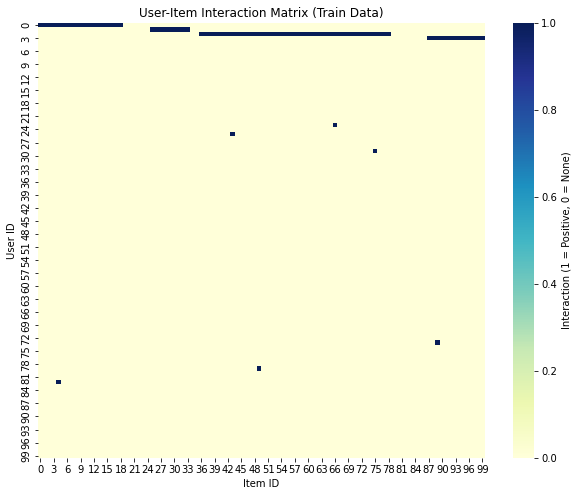

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a heatmap for a subset of the user-item matrix
def plot_interaction_heatmap(data_matrix, title, num_users=100, num_items=100):
    """
    Plots a heatmap of a subset of the user-item interaction matrix.
    Parameters:
        data_matrix: The matrix to visualize.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization purposes
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the training and testing matrices
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')

### Task 3: Item-to-Item Collaborative Filtering with Implicit Feedback

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the item-item similarity matrix
# Check sklearn documentation for cosine similarity to understand how we are
# using this function.
item_similarity = cosine_similarity(train_data_matrix.T)
print("Item-Item Similarity Matrix:")
print(item_similarity)
print(item_similarity.shape)


Item-Item Similarity Matrix:
[[1.         0.40824829 0.33333333 ... 0.         0.         0.        ]
 [0.40824829 1.         0.40824829 ... 0.         0.         0.        ]
 [0.33333333 0.40824829 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
(15109, 15109)


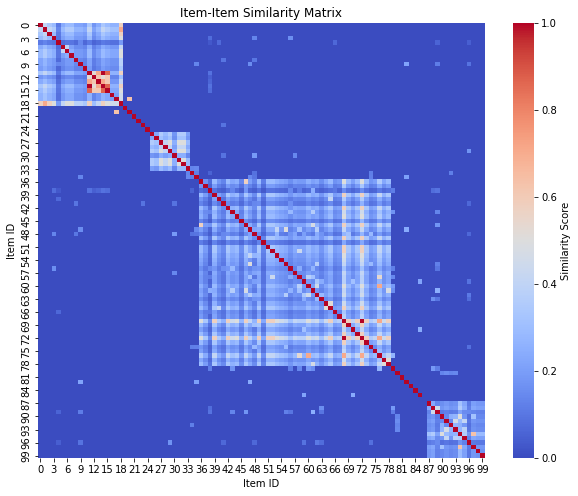

In [ ]:
# Function to visualize the item similarity matrix
def plot_item_similarity_heatmap(similarity_matrix, title, num_items=100):
    """
    Plots a heatmap of a subset of the item similarity matrix.
    Parameters:
        similarity_matrix: The item-item similarity matrix.
        title: The title of the plot.
        num_items: The number of items to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_items, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the item similarity matrix
plot_item_similarity_heatmap(item_similarity, 'Item-Item Similarity Matrix')

In [ ]:
import numpy as np

# Define the function to predict interactions based on item similarity
def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The item-item similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # np.dot does the matrix multiplication. Here we are calculating the
    # weighted sum of interactions based on item similarity
    pred = similarity.dot(interactions.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T  # Transpose to get users as rows and items as columns

# Calculate the item-based predictions for positive interactions
item_prediction = item_based_predict(train_data_matrix, item_similarity)
print("Predicted Interaction Matrix:")
print(item_prediction)
print(item_prediction.shape)

Predicted Interaction Matrix:
[[0.46097255 0.85435984 0.71867834 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


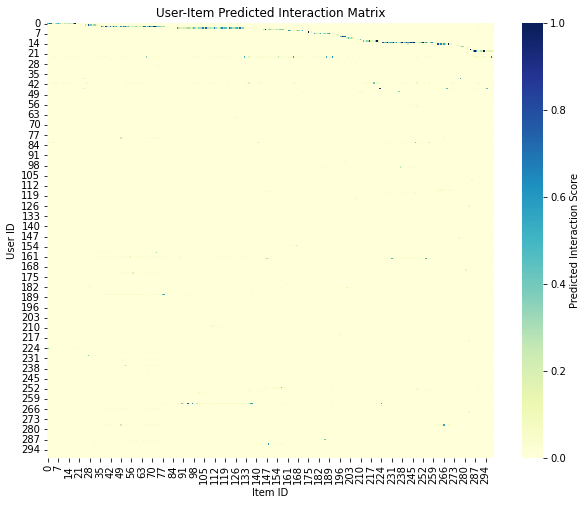

In [ ]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=300, num_items=300):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(item_prediction, 'User-Item Predicted Interaction Matrix')

### Task 4: User-to-User Collaborative Filtering with Implicit Feedback

In [ ]:
# Compute the user-user similarity matrix
user_similarity = cosine_similarity(train_data_matrix)
print("User-User Similarity Matrix:")
print(user_similarity)

# Check the shape as a sanity check
print("Shape of User Similarity Matrix:", user_similarity.shape)

User-User Similarity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Shape of User Similarity Matrix: (7838, 7838)


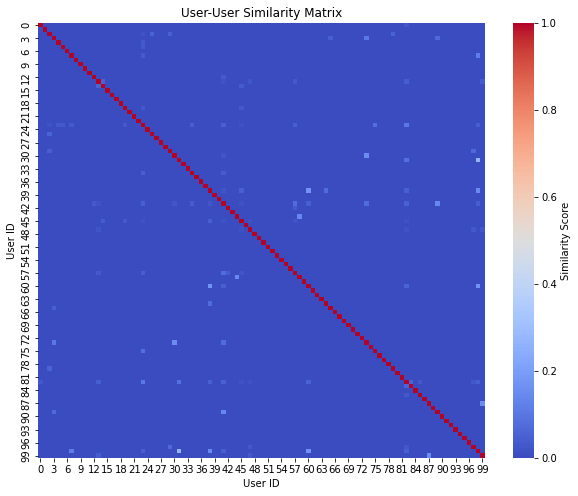

In [ ]:
# Function to plot the user similarity matrix
def plot_user_similarity_heatmap(similarity_matrix, title, num_users=100):
    """
    Plots a heatmap of a subset of the user similarity matrix.
    Parameters:
        similarity_matrix: The user-user similarity matrix.
        title: The title of the plot.
        num_users: The number of users to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_users, :num_users]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('User ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the user similarity matrix
plot_user_similarity_heatmap(user_similarity, 'User-User Similarity Matrix')

In [ ]:
# Define the function to predict interactions based on user similarity
def user_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on user-user similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The user-user similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # Calculate the weighted sum of interactions based on user similarity
    pred = similarity.dot(interactions) / (np.abs(similarity).sum(axis=1)[:, np.newaxis] + epsilon)
    return pred

# Calculate the user-based predictions for positive interactions
user_prediction = user_based_predict(train_data_matrix, user_similarity)
print("Predicted Interaction Matrix (User-Based):")
print(user_prediction)
print(user_prediction.shape)

Predicted Interaction Matrix (User-Based):
[[0.13171649 0.13259591 0.14274867 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


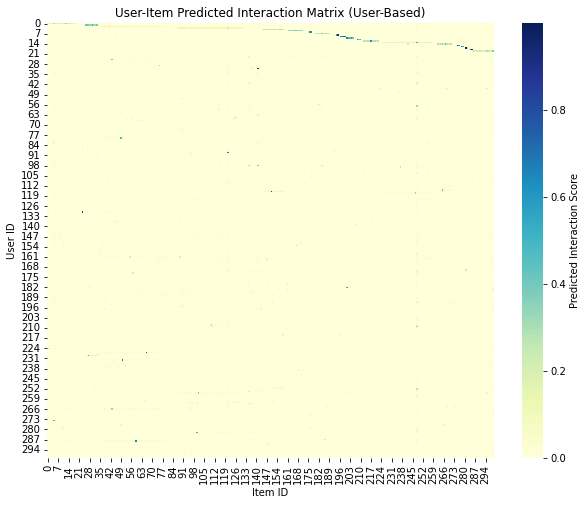

In [ ]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=300, num_items=300):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(user_prediction, 'User-Item Predicted Interaction Matrix (User-Based)')

### Task 5: Evaluating Our Recommenders

In [ ]:
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k = 0, 0

    for user in range(num_users):
        # Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]

        # Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.isin(top_k_items, np.where(ground_truth[user, :] == 1)[0]).sum()

        # Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()

        # Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

    # Average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users

    return precision_at_k, recall_at_k

In [ ]:
# Run this line after implementing the function
precision_user_k, recall_user_k = precision_recall_at_k(user_prediction, test_data_matrix, k=10)
precision_item_k, recall_item_k = precision_recall_at_k(item_prediction, test_data_matrix, k=10)

print('User-based CF Precision@K:', precision_user_k)
print('User-based CF Recall@K:', recall_user_k)
print('Item-based CF Precision@K:', precision_item_k)
print('Item-based CF Recall@K:', recall_item_k)

User-based CF Precision@K: 0.056455728502171655
User-based CF Recall@K: 0.2899013913583887
Item-based CF Precision@K: 0.05567746874202883
Item-based CF Recall@K: 0.2640441131423877


In [ ]:
import random

# Pick a user at random
user_id = random.choice(range(user_prediction.shape[0]))
print("Selected User ID:", user_id)

# Get top-10 recommendations for the user from User-to-User CF
user_top_10 = np.argsort(user_prediction[user_id, :])[-10:][::-1]

# Get top-10 recommendations for the user from Item-to-Item CF
item_top_10 = np.argsort(item_prediction[user_id, :])[-10:][::-1]

# Display top-10 recommended movie IDs for both models
display(user_top_10)
display(item_top_10)

Selected User ID: 51


array([915, 924, 925, 932, 930, 933, 914, 927, 931, 929])

array([921, 918, 920, 916, 928, 926, 936, 934, 935, 919])

In [ ]:
# Convert user_top_10 and item_top_10 arrays into DataFrames
user_top_10_df = pd.DataFrame({'movie_id': user_top_10})
item_top_10_df = pd.DataFrame({'movie_id': item_top_10})

# Merge with links_df to get the tmdbId
user_recommendations_df = user_top_10_df.merge(links, left_on='movie_id', right_on='movie_id')
item_recommendations_df = item_top_10_df.merge(links, left_on='movie_id', right_on='movie_id')

# Merge with movies_df to add the title column
user_recommendations_df = user_recommendations_df.merge(movies[['movie_id', 'title']], left_on='movie_id', right_on='movie_id')
item_recommendations_df = item_recommendations_df.merge(movies[['movie_id', 'title']], left_on='movie_id', right_on='movie_id')

# Select only the columns we want to display
user_recommendations_df = user_recommendations_df[['movie_id', 'title', 'tmdbId']]
item_recommendations_df = item_recommendations_df[['movie_id', 'title', 'tmdbId']]

# Display the results
display(user_recommendations_df)
display(item_recommendations_df)

NameError: name 'links' is not defined

### prova da kaggle


In [ ]:
interactions_with_items = interactions.merge(items, on='i', how='left')
interactions_with_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87045 entries, 0 to 87044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   u           87045 non-null  int64  
 1   i           87045 non-null  int64  
 2   t           87045 non-null  float64
 3   Title       87045 non-null  object 
 4   Author      71915 non-null  object 
 5   ISBN Valid  83508 non-null  object 
 6   Publisher   86922 non-null  object 
 7   Subjects    76169 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.3+ MB


In [ ]:
selected_features = ['Title','Author','Subjects']
print(selected_features)

['Title', 'Author', 'Subjects']


In [ ]:
for feature in selected_features:
    interactions_with_items[feature] = interactions_with_items[feature].fillna('')

In [ ]:
combined_features = interactions_with_items['Title'] + ' ' + interactions_with_items['Subjects'] + ' ' + interactions_with_items['Author'] 
combined_features

0                Ashes falling for the sky /  Gorman, Nine
1         La page blanche / Bandes dessinées Boulet, 1975-
2        Aysuun : roman / Vengeance; Thriller (roman) M...
3        Le cercle des rêveurs éveillés / Roman policie...
4        L'examen clinique de l'aîné : guide d'évaluati...
                               ...                        
87040    Différence & souffrance de l'adulte surdoué / ...
87041    Replay : mémoires d'une famille /  Mechner, Jo...
87042    Vers une gestion éducative de la classe / Clas...
87043    A Short History of the World in 50 Lies /  Tid...
87044    L'art dans l'espace public : une analyse socio...
Length: 87045, dtype: object

In [ ]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 2736)	0.4354595998602811
  (0, 11326)	0.4354595998602811
  (0, 11983)	0.3021019517028073
  (0, 29825)	0.20691232962850672
  (0, 28070)	0.4354595998602811
  (0, 13343)	0.3885002985213019
  (0, 21562)	0.3822486459655414
  (1, 17363)	0.1277918218774901
  (1, 22558)	0.4886068542614903
  (1, 4342)	0.4684281509849102
  (1, 3453)	0.17460260546889483
  (1, 8625)	0.17577687508604878
  (1, 4673)	0.5899747335784243
  (1, 591)	0.34066683678090115
  (2, 3266)	0.5075176192202946
  (2, 26241)	0.3222152587018927
  (2, 31282)	0.421284373450545
  (2, 29913)	0.30896317095770204
  (2, 19019)	0.4576470285054414
  (2, 15004)	0.3952513456256913
  (3, 26241)	0.1333258894958066
  (3, 17681)	0.11258157136137736
  (3, 5887)	0.3847104654410857
  (3, 8558)	0.11956116272543785
  (3, 26784)	0.43173692202981934
  :	:
  (87043, 785)	0.3013320609589157
  (87043, 32483)	0.3036073681424916
  (87043, 21207)	0.37561942359480816
  (87043, 14550)	0.2450110164864916
  (87043, 18048)	0.3707786624153032
  (87043, 27831)	0

In [ ]:
similarity = cosine_similarity(feature_vectors, feature_vectors)

In [ ]:
print(similarity)

In [ ]:
list_of_all_titles = df['title'].tolist()
print(list_of_all_titles)

In [ ]:
book_name = input(' Enter your favourite book name : ')

In [ ]:
find_close_match = difflib.get_close_matches(book_name, list_of_all_titles)
print(find_close_match)

In [ ]:
close_match = find_close_match[0]
index_of_the_book = df[df.title == close_match].index[0]